In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils import paths

In [10]:
image1 = cv2.imread('Objects/butterfly/image_0022.jpg')

In [12]:
image2 = cv2.imread('Objects/butterfly/image_0026.jpg')

In [13]:
image3 = cv2.imread('Objects/butterfly/image_0087.jpg')

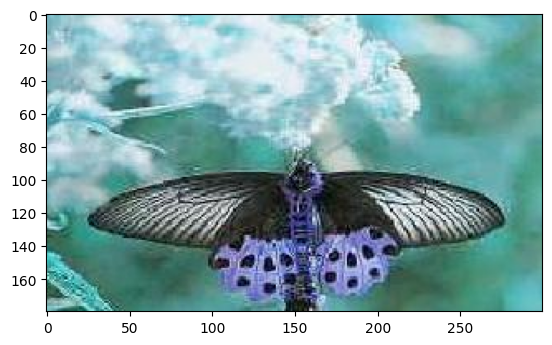

In [14]:
plt.imshow(image1)

In [15]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

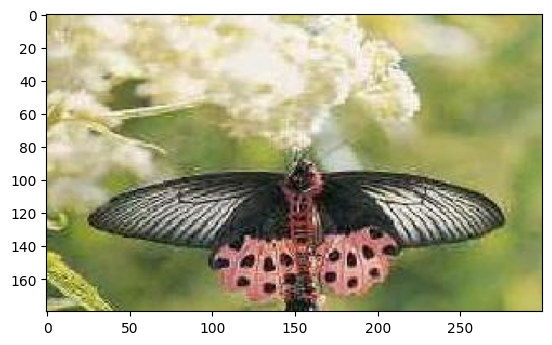

In [16]:
plt.imshow(image1)

In [17]:
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [18]:
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

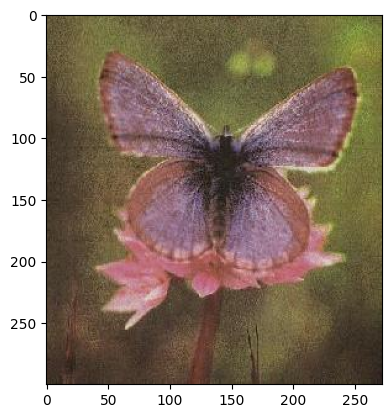

In [19]:
plt.imshow(image2)

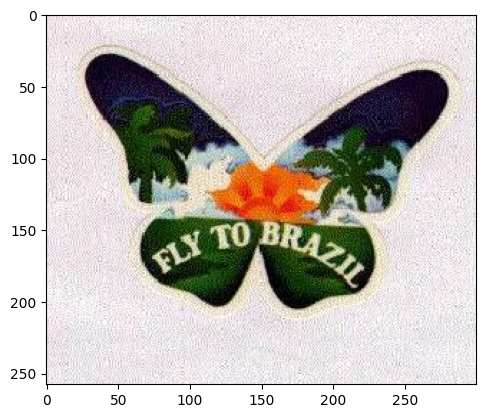

In [20]:
plt.imshow(image3)

In [21]:
imutils.is_cv2()

False

In [22]:
class RGBHistogram:
    def __init__(self, bins):
        # store the number of bins the histogram will use
        self.bins = bins
 
    def describe(self, image):
        # compute a 3D histogram in the RGB colorspace,
        # then normalize the histogram so that images
        # with the same content, but either scaled larger
        # or smaller will have (roughly) the same histogram
        hist = cv2.calcHist([image], [0, 1, 2],None, self.bins, [0, 256, 0, 256, 0, 256])
       # hist = cv2.normalize(hist)
        hist = cv2.normalize(hist, hist)
 
        # return out 3D histogram as a flattened array
        return hist.flatten()

In [23]:
class HSVHistogram:
    def __init__(self, bins):
        # store the number of bins the histogram will use
        self.bins = bins
 
    def describe(self, image):
        # compute a 3D histogram in the RGB colorspace,
        # then normalize the histogram so that images
        # with the same content, but either scaled larger
        # or smaller will have (roughly) the same histogram
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        hist = cv2.calcHist([image], [0, 1, 2],None, self.bins, [0, 256, 0, 256, 0, 256])
       # hist = cv2.normalize(hist)
        hist = cv2.normalize(hist, hist)
 
        # return out 3D histogram as a flattened array
        return hist.flatten()

In [24]:
def chi2_distance(histA, histB, eps = 1e-10):
	# compute the chi-squared distance
	d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
		for (a, b) in zip(histA, histB)])
	# return the chi-squared distance
	return d

In [25]:
descRGB = RGBHistogram([8, 8, 8])

In [26]:
descHSV = HSVHistogram([8, 8, 8])

In [27]:
features1RGB = descRGB.describe(image1)

In [28]:
features2RGB = descRGB.describe(image2)

In [29]:
features3RGB = descRGB.describe(image3)

In [30]:
d = chi2_distance(features1RGB, features2RGB)
d

np.float32(2.6454124)

In [31]:
d = chi2_distance(features2RGB, features3RGB)
d

np.float32(2.725409)

In [32]:
d = chi2_distance(features1RGB, features3RGB)
d

np.float32(2.461968)

In [33]:
features1HSV = descHSV.describe(image1)

In [34]:
features2HSV = descHSV.describe(image2)

In [35]:
features3HSV = descHSV.describe(image3)

In [36]:
d = chi2_distance(features1HSV, features2HSV)
d

np.float32(2.9439106)

In [37]:
d = chi2_distance(features2HSV, features3HSV)
d

np.float32(2.926208)

In [38]:
d = chi2_distance(features1HSV, features3HSV)
d

np.float32(2.9699583)

In [39]:
imagePaths = list(paths.list_images('Objects/butterfly/'))

In [41]:
i=0
dlist=[]
for (i, imagePath) in enumerate(imagePaths):
    # load the input image
    print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
    imagedb = cv2.imread(imagePath)
    imagedb = cv2.cvtColor(imagedb, cv2.COLOR_BGR2RGB)
    featuresHSVdb = descHSV.describe(imagedb)
    d=chi2_distance(featuresHSVdb, features1HSV)
    dlist.append((d,imagePath))
    

[INFO] processing image 1/91
[INFO] processing image 2/91
[INFO] processing image 3/91
[INFO] processing image 4/91
[INFO] processing image 5/91
[INFO] processing image 6/91
[INFO] processing image 7/91
[INFO] processing image 8/91
[INFO] processing image 9/91
[INFO] processing image 10/91
[INFO] processing image 11/91
[INFO] processing image 12/91
[INFO] processing image 13/91
[INFO] processing image 14/91
[INFO] processing image 15/91
[INFO] processing image 16/91
[INFO] processing image 17/91
[INFO] processing image 18/91
[INFO] processing image 19/91
[INFO] processing image 20/91
[INFO] processing image 21/91
[INFO] processing image 22/91
[INFO] processing image 23/91
[INFO] processing image 24/91
[INFO] processing image 25/91
[INFO] processing image 26/91
[INFO] processing image 27/91
[INFO] processing image 28/91
[INFO] processing image 29/91
[INFO] processing image 30/91
[INFO] processing image 31/91
[INFO] processing image 32/91
[INFO] processing image 33/91
[INFO] processing i

In [42]:
dlist.sort(key=lambda x: x[0])

In [44]:
dresult=[]
for i in range(0,8):
    dresult.append(dlist[i][0])

In [45]:
imresult=[]
for i in range(0,8):
    image = cv2.imread(dlist[i][1])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imresult.append(image)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols=1, titles=None):
    n_images = len(images)
    if titles is None:
        titles = [''] * n_images

    fig = plt.figure(figsize=(15, 8))

    n_rows = int(np.ceil(n_images / float(cols)))

    for n, (image, title) in enumerate(zip(images, titles)):
        ax = fig.add_subplot(n_rows, cols, n + 1)
        if image.ndim == 2:
            plt.gray()
        ax.imshow(image)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


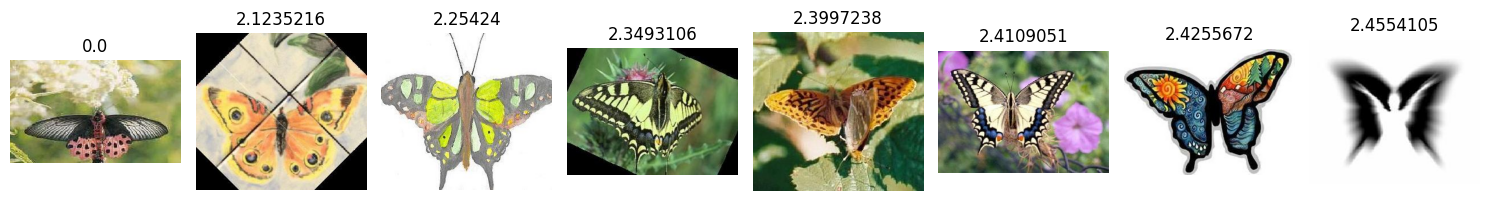

In [50]:
show_images(imresult,8,dresult)